# SOLAR POWER PREDICTION FOR NEXT THREE DAYS 

# Time Series Forecasting 

In [16]:
#import important libraries 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
plant=pd.read_csv('Plant_1_Generation_Data.csv')
plant.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
plant.shape

(68778, 7)

In [5]:
plant.info() #this dataset doesn't have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
plant.drop('PLANT_ID',inplace=True,axis=1) #drop 'Plant Id' it's not an important features 

In [7]:
plant['DATE_TIME']=pd.to_datetime(plant['DATE_TIME'],format="%d-%m-%Y %H:%M")

In [8]:
plant1=plant.groupby('DATE_TIME').sum().reset_index()
plant1['time']=plant1['DATE_TIME'].dt.time


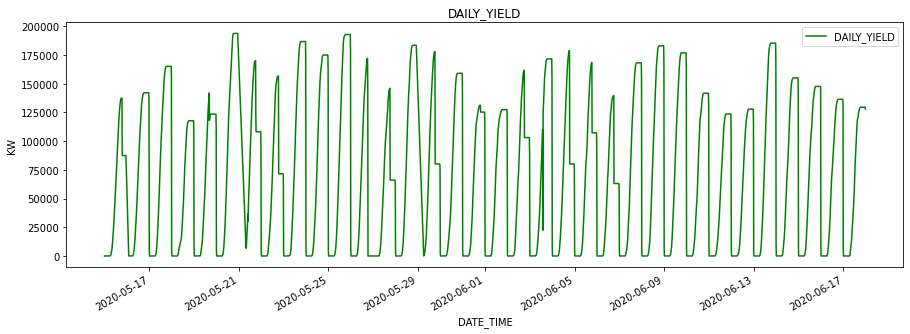

In [9]:
#plot for Daily Yield
plant1.plot(x='DATE_TIME',y='DAILY_YIELD',figsize=(15,5),title='DAILY_YIELD',color='g')
plt.ylabel('KW')
plt.show()

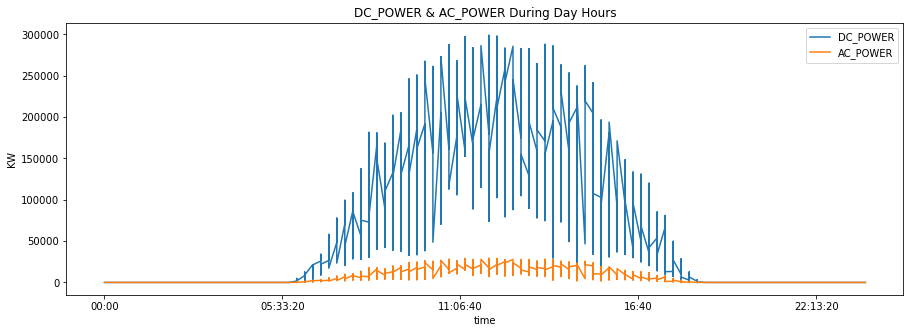

In [10]:
#plot for DC_POWER & AC_POWER During Day Hours
plant1.set_index('time').drop('DATE_TIME',axis=1)[['DC_POWER','AC_POWER']].plot(figsize=(15,5))
plt.title('DC_POWER & AC_POWER During Day Hours')
plt.ylabel('KW')
plt.show()

In [11]:
daily_plant_generation=plant1.copy()
daily_plant_generation['date']=daily_plant_generation['DATE_TIME'].dt.date
daily_plant_generation=daily_plant_generation.groupby('date').sum()

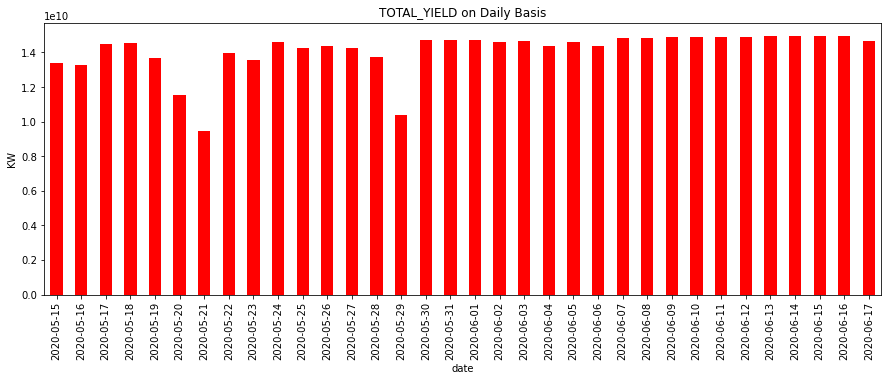

In [12]:
#plot for TOTAL_YIELD on Daily Basis
daily_plant_generation['TOTAL_YIELD'].plot(kind='bar',figsize=(15,5),color='r')
plt.title('TOTAL_YIELD on Daily Basis')
plt.ylabel('KW')
plt.show()

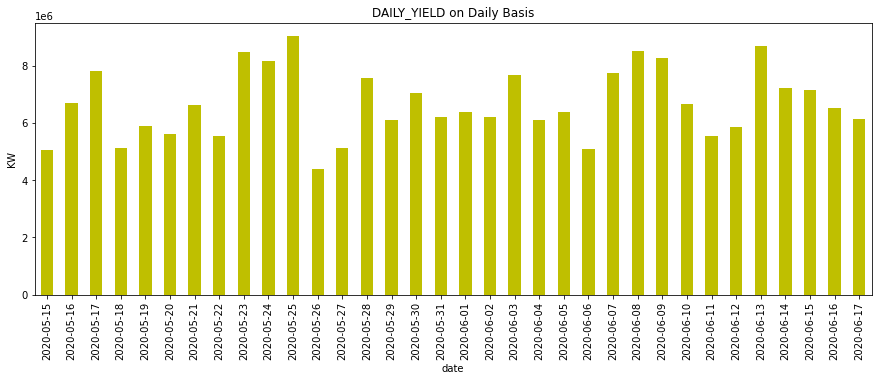

In [13]:
#plot for DAILY_YIELD on Daily Basis
daily_plant_generation['DAILY_YIELD'].plot(kind='bar',figsize=(15,5),color='y')
plt.title('DAILY_YIELD on Daily Basis')
plt.ylabel('KW')
plt.show()

# DC POWER and DAILY YIELD in PLANT

C:\Users\Spk\anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(
C:\Users\Spk\anaconda\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


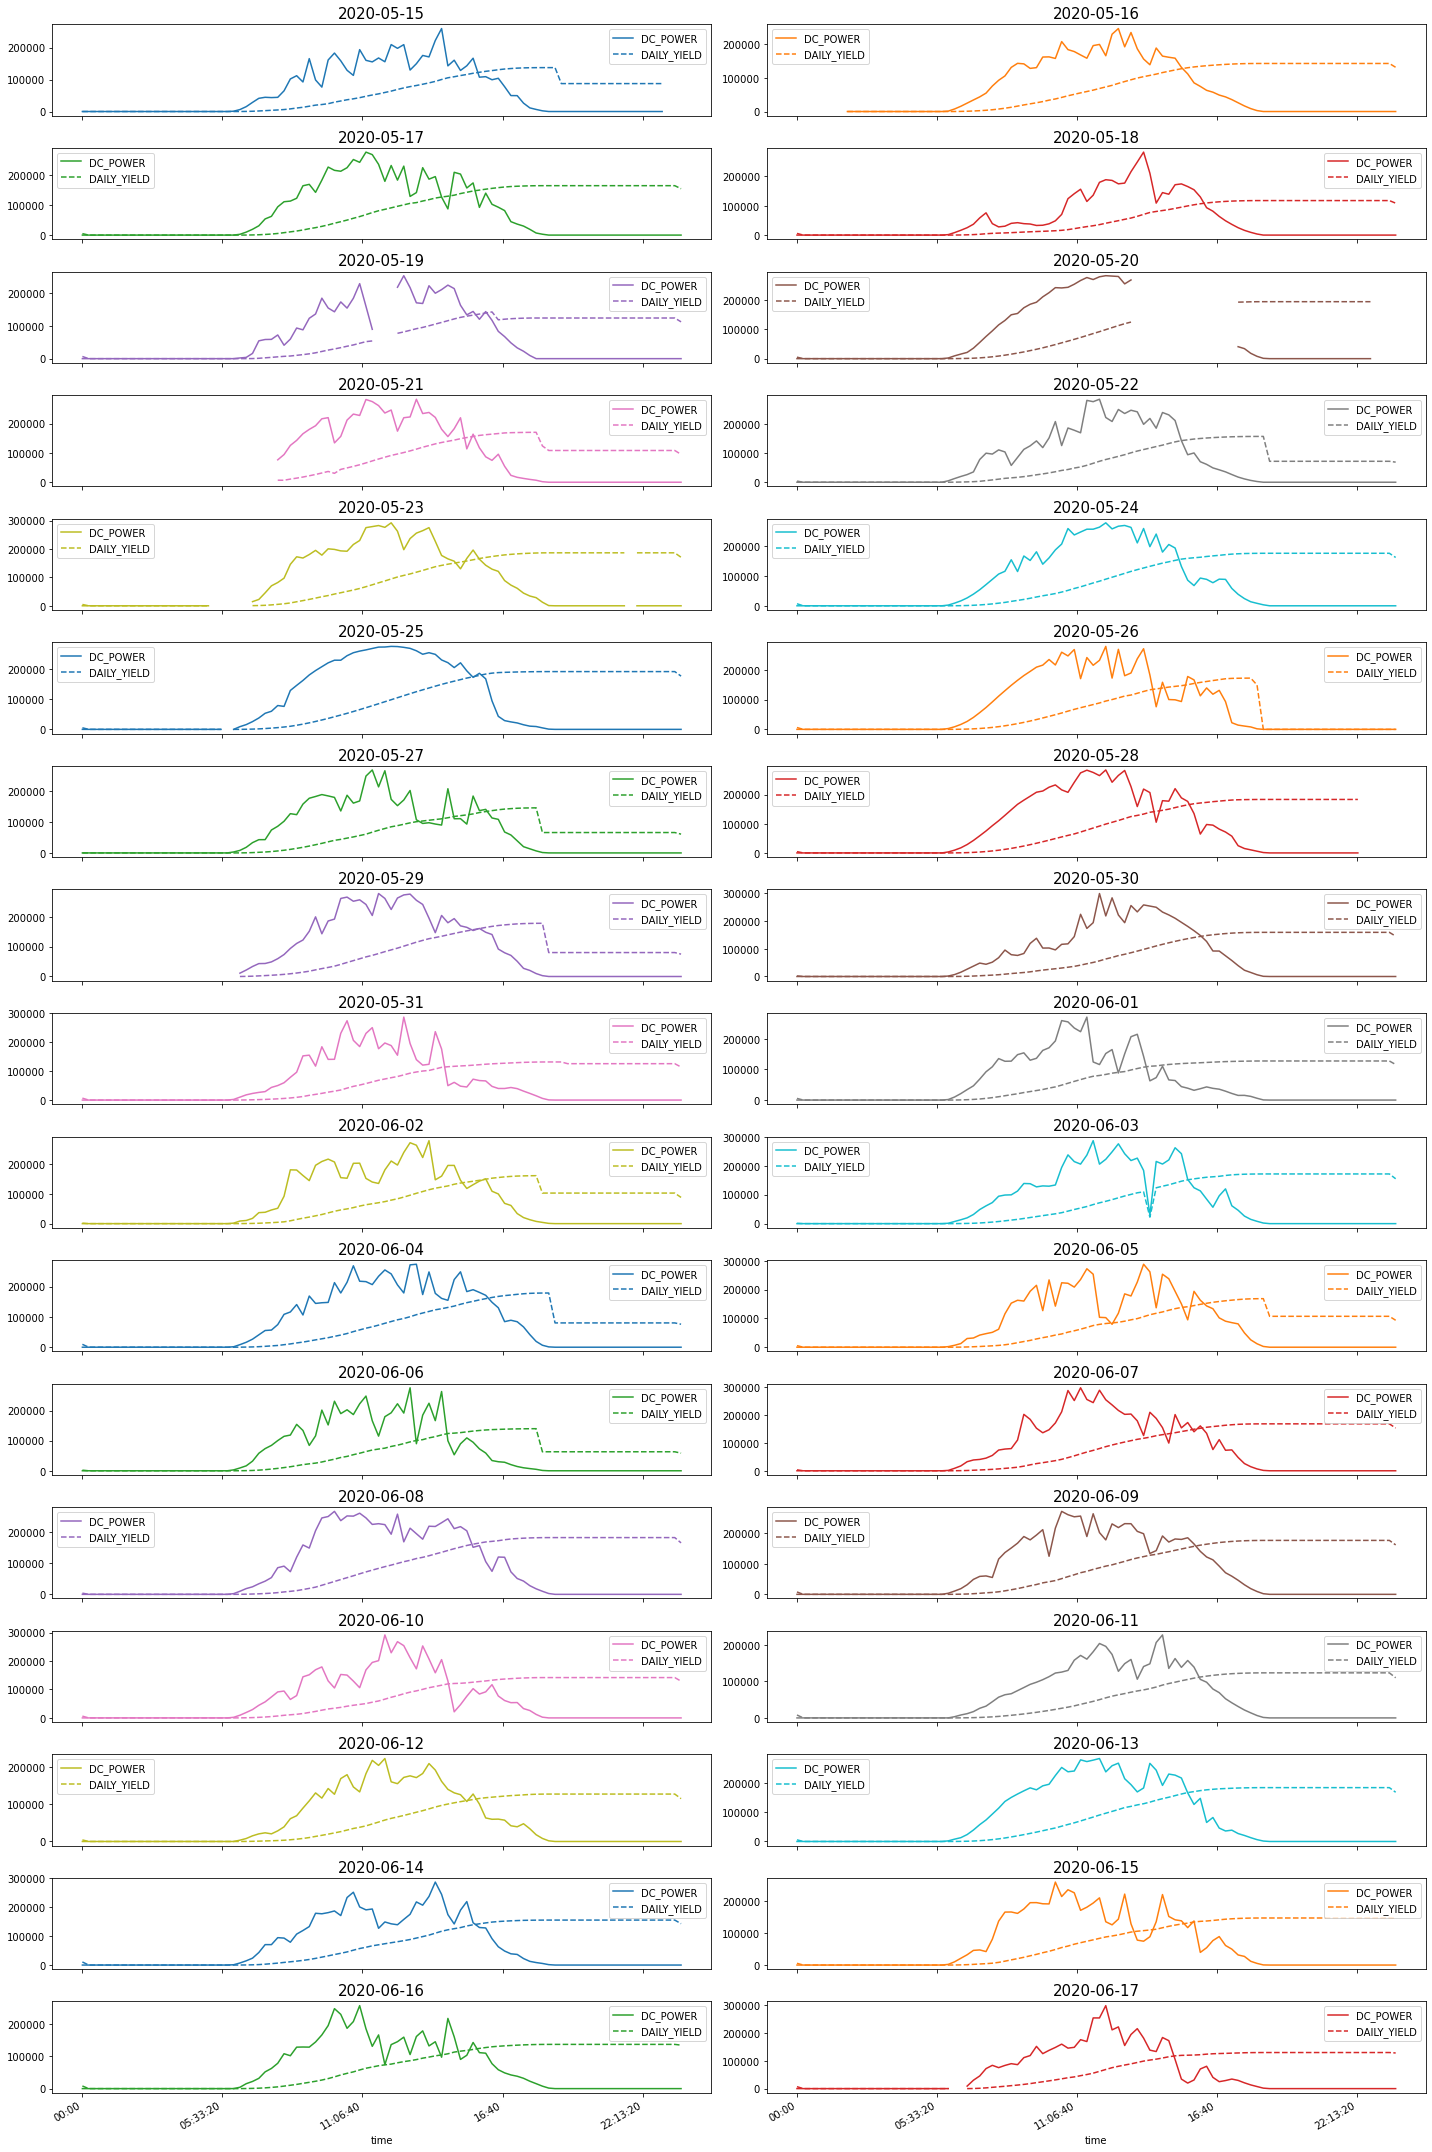

In [15]:
power=plant1.copy()
power['time']=power['DATE_TIME'].dt.time
power['day']=power['DATE_TIME'].dt.date
date=power.groupby(['time','day'])['DC_POWER'].mean().unstack()
power_generation=power.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
power.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='--',ax=power_generation)
i=0
for a in range(len(power_generation)):
    for b in range(len(power_generation[a])):
        power_generation[a,b].set_title(date.columns[i],size=15)
        power_generation[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1
plt.tight_layout()
plt.show()

# Losses during convertion of DC Power to AC Power

In [15]:
plant1_losses=plant1.copy()
plant1_losses['day']=plant1_losses['DATE_TIME'].dt.date
plant1_losses=plant1_losses.groupby('day').sum()

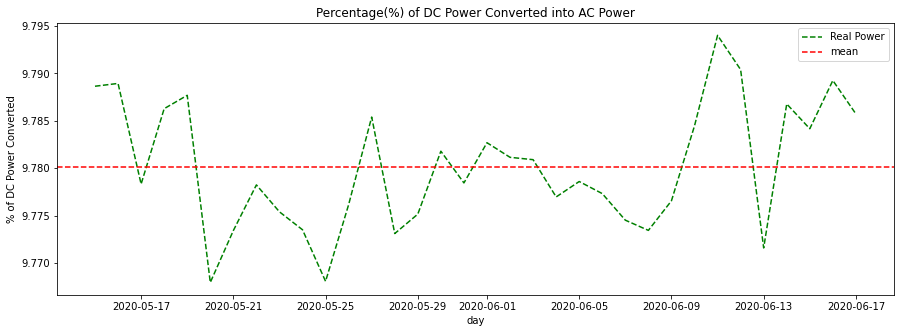

In [16]:
plant1_losses['losses']=(plant1_losses['AC_POWER']/plant1_losses['DC_POWER'])*100
plant1_losses['losses'].plot(style='g--',figsize=(15,5),label="Real Power")
plt.title('Percentage(%) of DC Power Converted into AC Power')
plt.ylabel('% of DC Power Converted')
plt.axhline(plant1_losses['losses'].mean(),linestyle='--',label='mean',color='r')
plt.legend()
plt.show()

 The figure clearly shows that "9.78 %" mean (red line in the figure) of DC Power only converted into AC Power, Because there is some problem in the inverters so we have to check the inverters and taking them into maintenance to rectify the problem.

# How Much DC Power Generated in a day using in different Inverters  

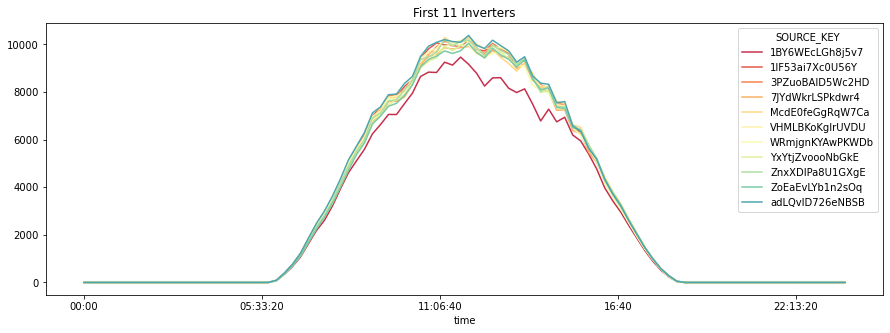

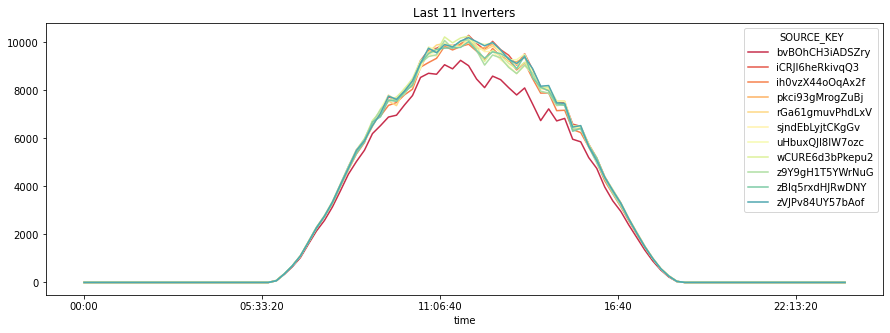

In [17]:
inverter=plant.copy()
inverter['time']=inverter['DATE_TIME'].dt.time
inverter_source=inverter.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()
cmap = sns.color_palette("Spectral", n_colors=11)
inverter_source.iloc[:,0:11].plot(color=cmap,figsize=(15,5),title='First 11 Inverters')
inverter_source.iloc[:,11:].plot(color=cmap,figsize=(15,5),title='Last 11 Inverters')
plt.show()

The Figure clearly shows these '1BY6WEcLGh8j5v7' and 'bvBOhCH3iADSZry' inverters are underperforming in this power plant.
So we have to check the performance of this inverters.

<ipython-input-18-b00c1af181dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inverter_source['time']=inverter_source['DATE_TIME'].dt.time
<ipython-input-18-b00c1af181dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inverter_source['day']=inverter_source['DATE_TIME'].dt.date
C:\Users\Spk\anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(
C:\Users\Spk\anaconda\lib\site-packages\pandas\plotting\_matplo

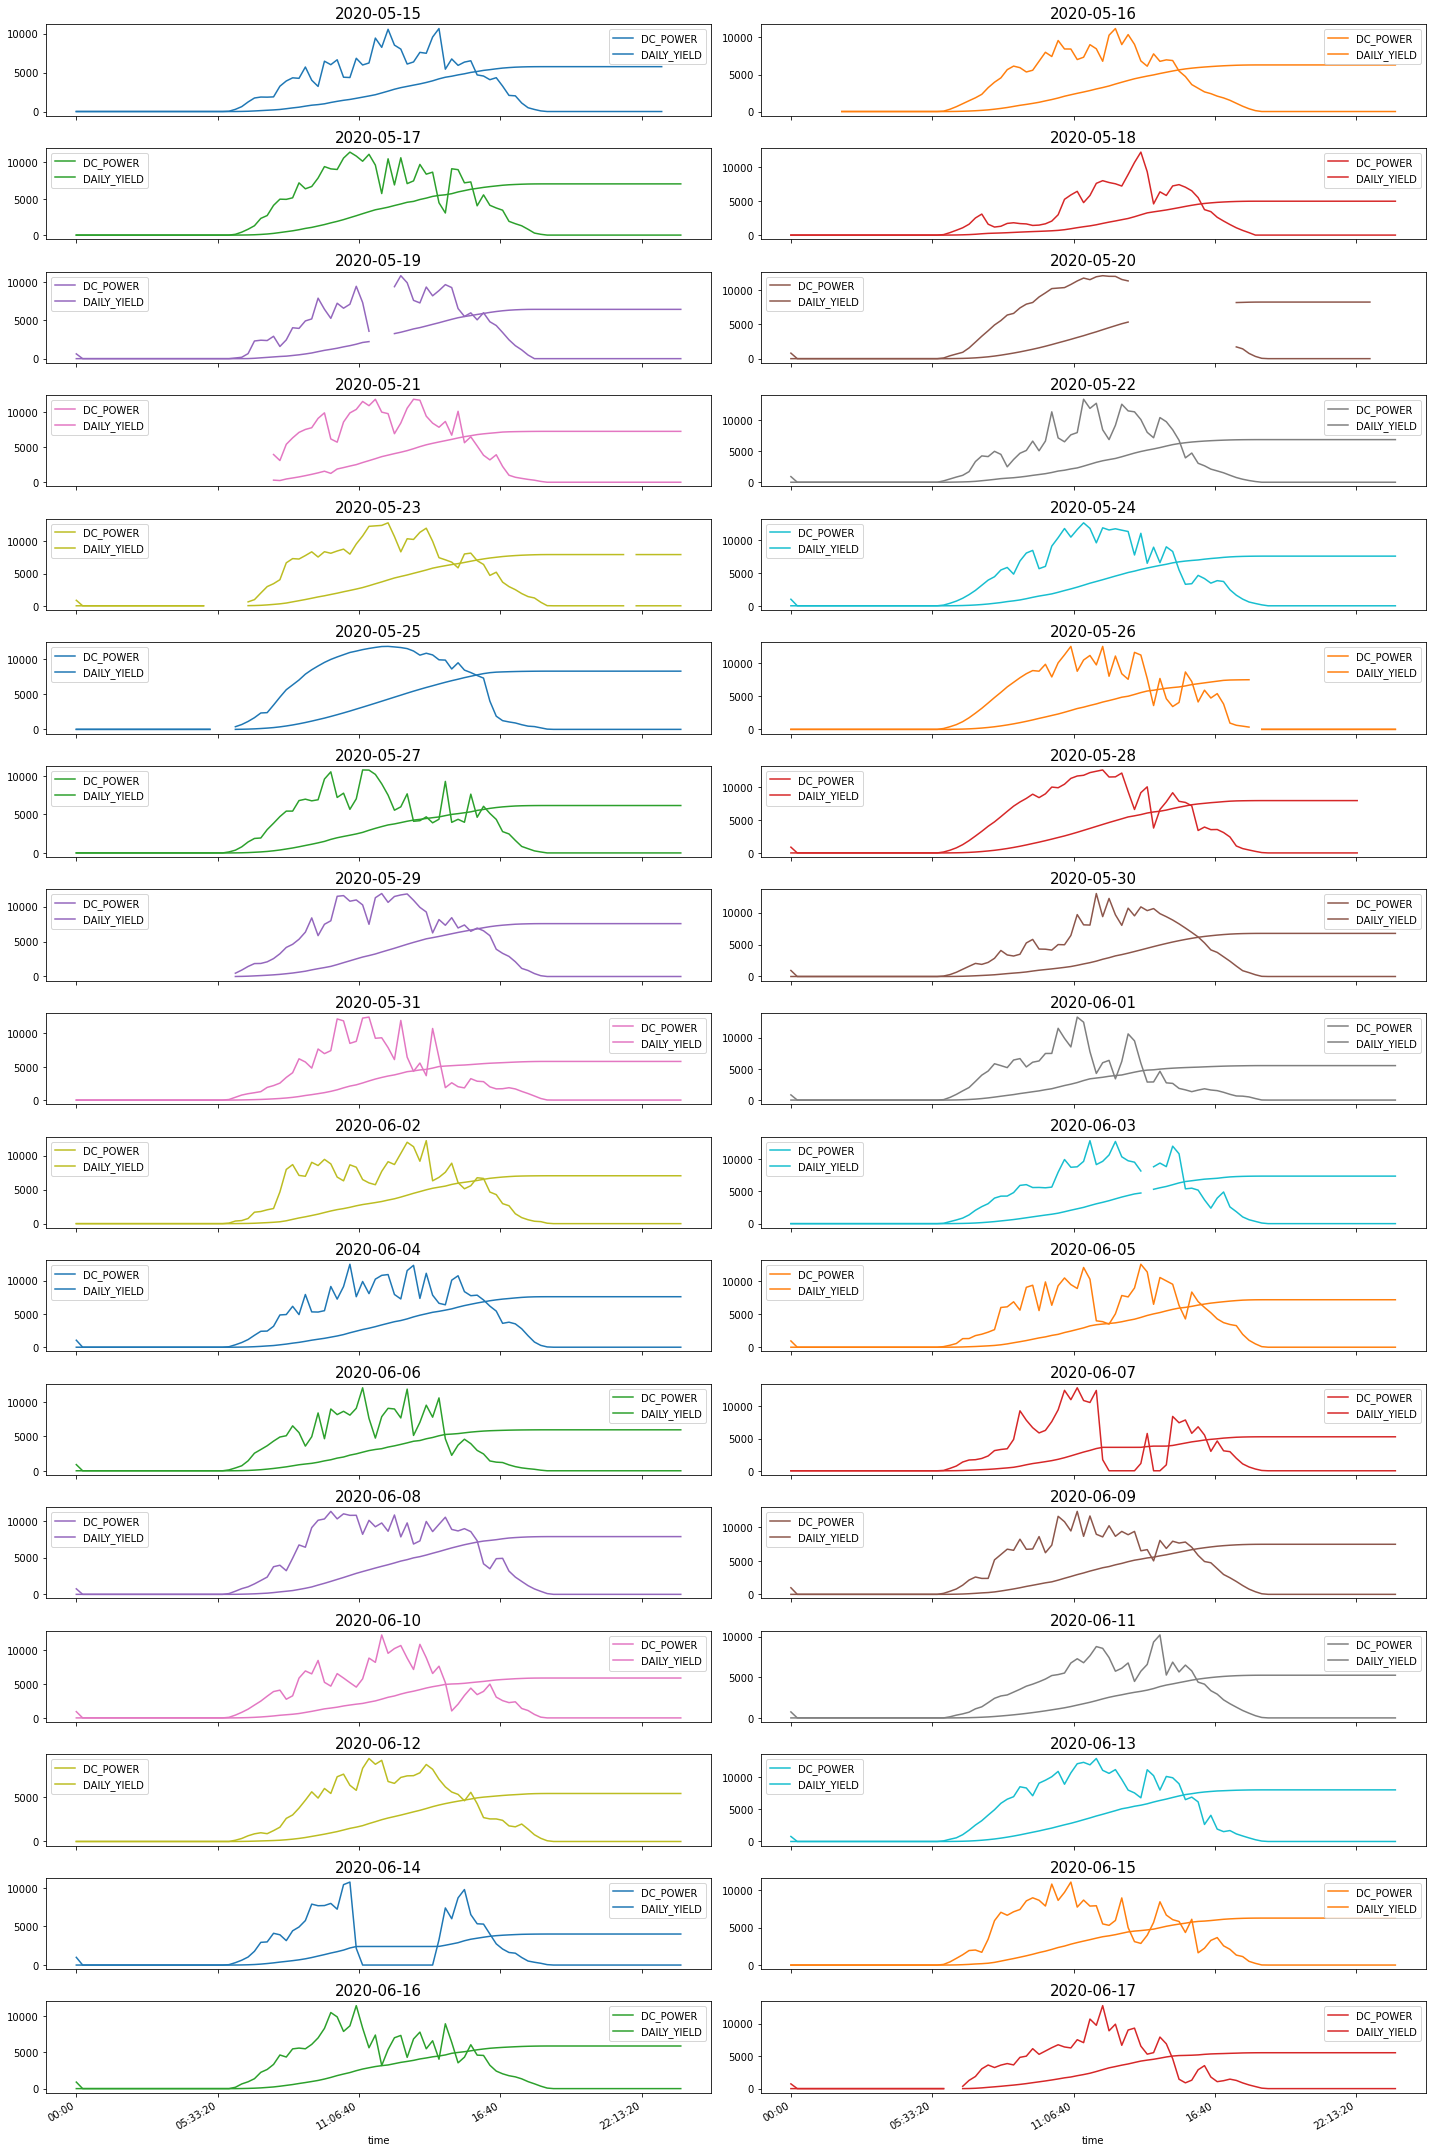

In [18]:
inverter_source=plant[plant['SOURCE_KEY']=='1BY6WEcLGh8j5v7']
inverter_source['time']=inverter_source['DATE_TIME'].dt.time
inverter_source['day']=inverter_source['DATE_TIME'].dt.date

worst_inverter1=inverter_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))

inverter_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=worst_inverter1)

i=0
for a in range(len(worst_inverter1)):
    for b in range(len(worst_inverter1[a])):
        worst_inverter1[a,b].set_title(date.columns[i],size=15)
        worst_inverter1[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

<ipython-input-19-c121d0cf87ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inverter_source1['time']=inverter_source1['DATE_TIME'].dt.time
<ipython-input-19-c121d0cf87ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inverter_source1['day']=inverter_source1['DATE_TIME'].dt.date
C:\Users\Spk\anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(
C:\Users\Spk\anaconda\lib\site-packages\pandas\plotting\_ma

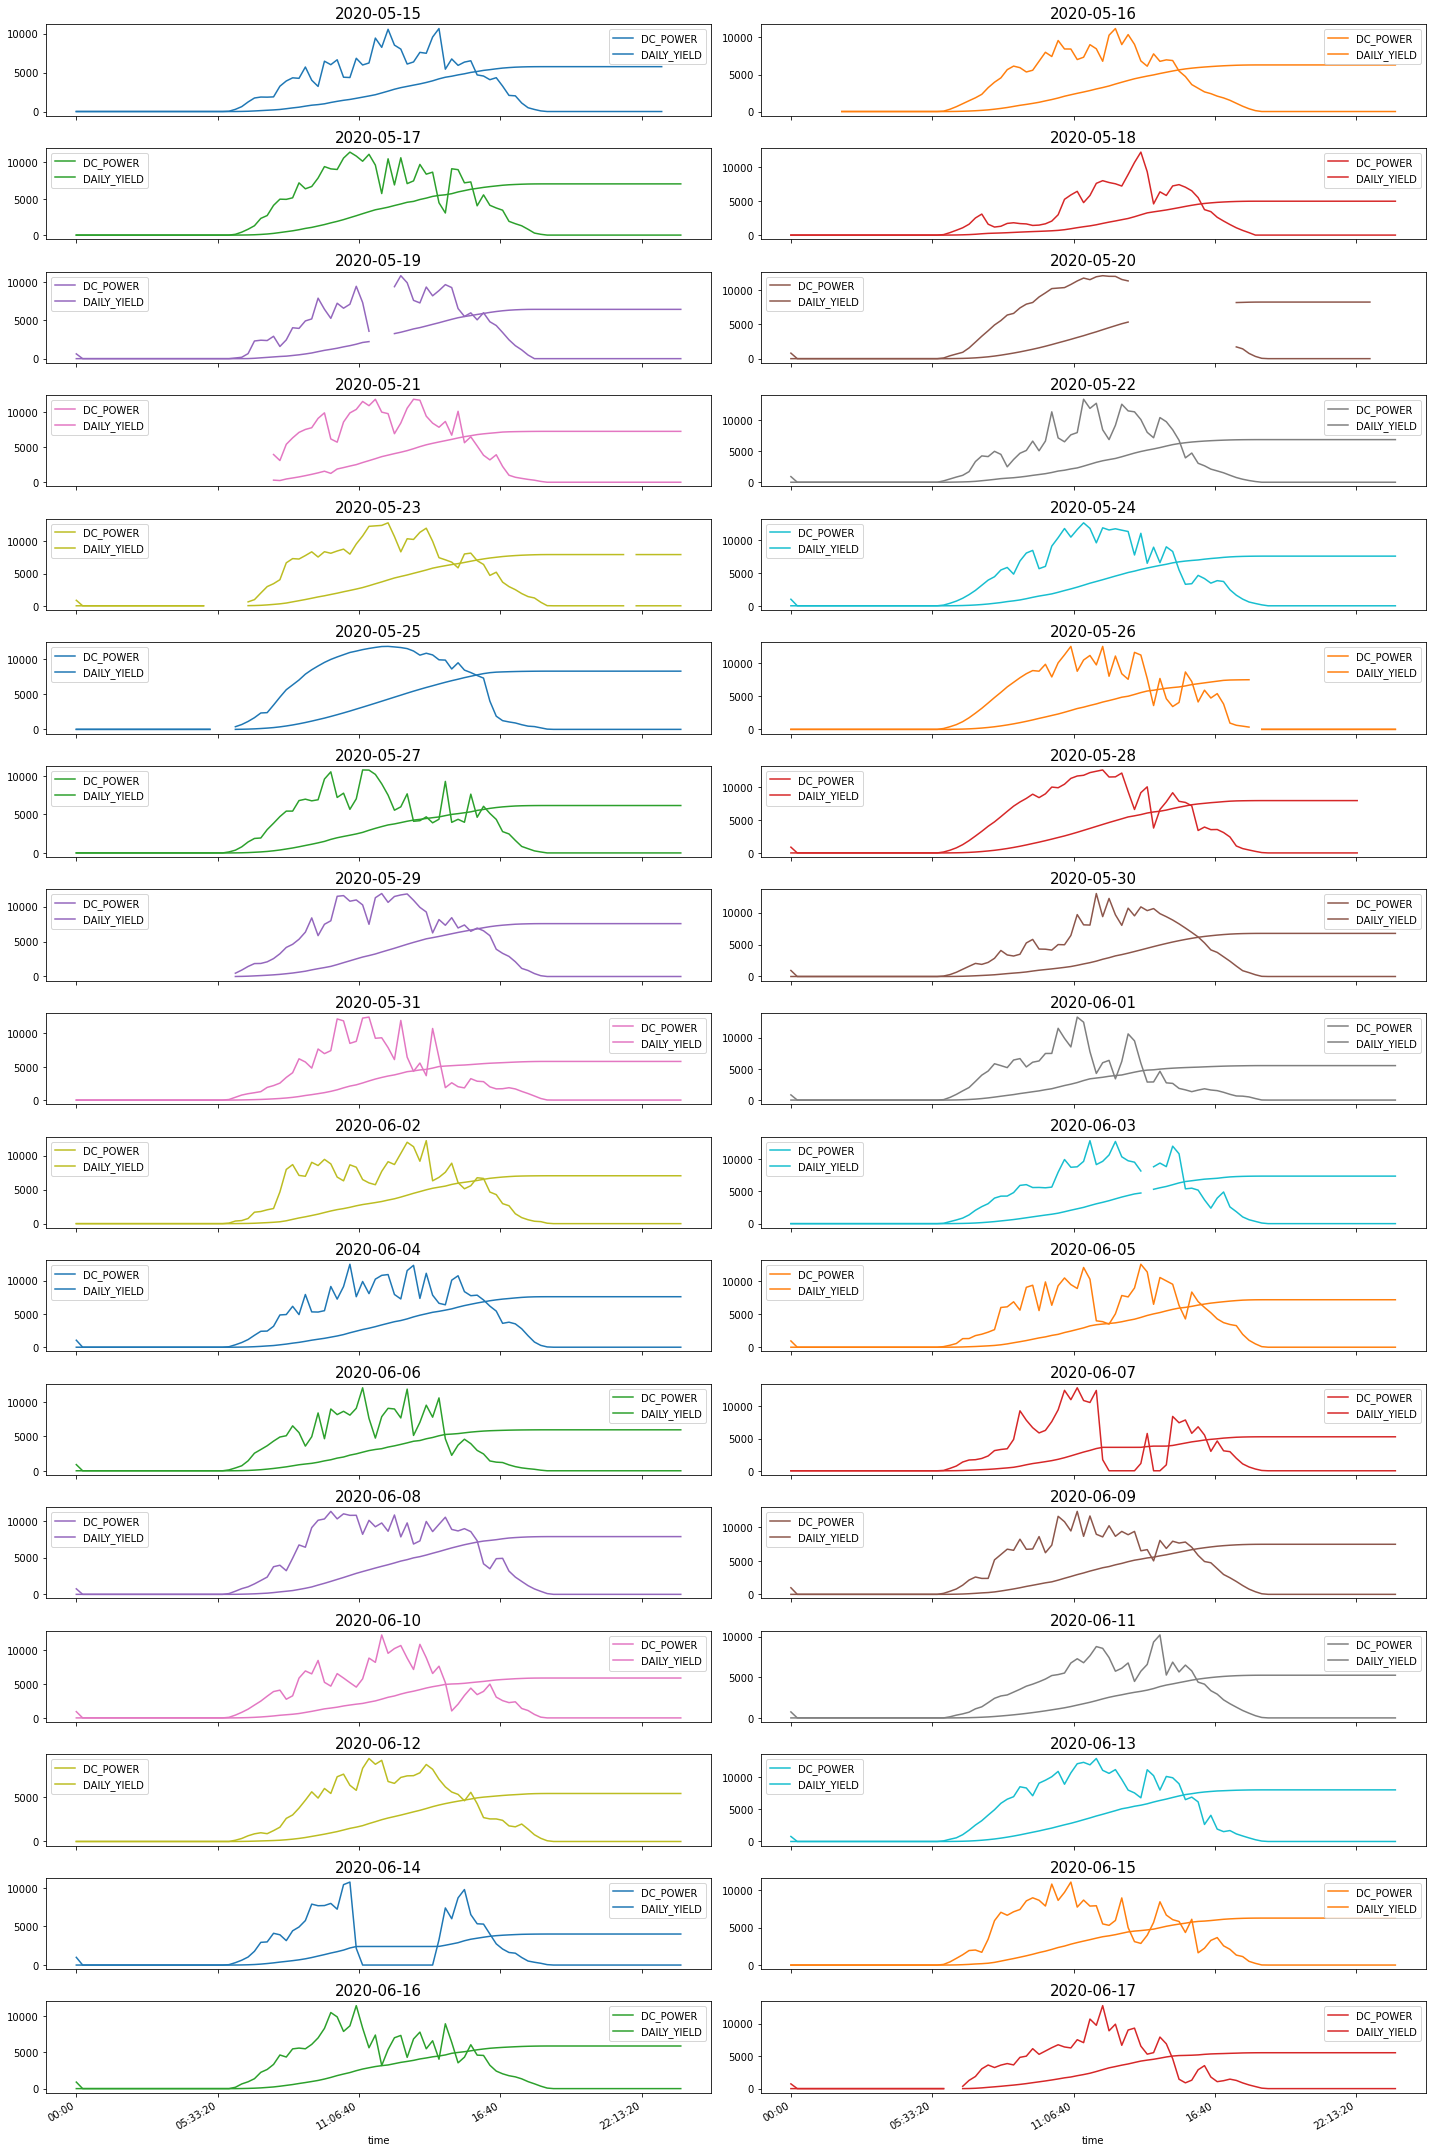

In [19]:
inverter_source1=plant[plant['SOURCE_KEY']=='bvBOhCH3iADSZry']
inverter_source1['time']=inverter_source1['DATE_TIME'].dt.time
inverter_source1['day']=inverter_source1['DATE_TIME'].dt.date

worst_inverter2=inverter_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))

inverter_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=worst_inverter2)

i=0
for a in range(len(worst_inverter2)):
    for b in range(len(worst_inverter2[a])):
        worst_inverter2[a,b].set_title(date.columns[i],size=15)
        worst_inverter2[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

These two inverters on "07-06-2020 and 14-06-2020", DC power produced by the inverters goes to 0 during heavy sunlight. So these can only be the fault inverters. So we have to rectify the problems in inverters 

# Prediction the Power Generation for next three days

In [20]:
from pandas.tseries.offsets import DateOffset
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [21]:
power_pred=plant1.groupby('DATE_TIME').sum()
power_pred=power_pred['DAILY_YIELD'][-382:].reset_index()
power_pred.set_index('DATE_TIME',inplace=True)

# Test for Stationary

In [22]:
test_result=adfuller(power_pred['DAILY_YIELD'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(daily_yield):
    result=adfuller(daily_yield)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(power_pred['DAILY_YIELD'])

ADF Test Statistic : -2.2594704746413186
p-value : 0.18537278009699004
#Lags Used : 1
Number of Observations Used : 380
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Split the Train and Test Data

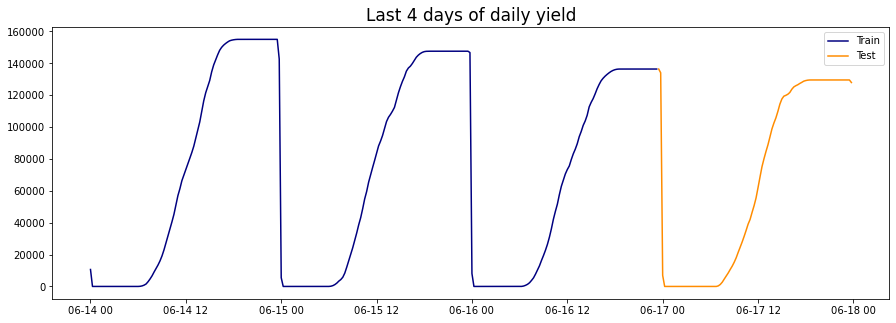

In [24]:
train_data=power_pred[0:286]
test_data=power_pred[286:]
plt.figure(figsize=(15,5))
plt.plot(train_data,label='Train',color='navy')
plt.plot(test_data,label='Test',color='darkorange')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()

# Tune with the auto_arima function

In [25]:
arima_model = auto_arima(train_data,
                         start_p=0,d=1,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=18,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=3235.281, Time=179.45 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=3226.480, Time=218.39 sec


C:\Users\Spk\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


 ARIMA(0,1,1)(0,1,1)[96]             : AIC=3226.373, Time=89.41 sec
 ARIMA(0,1,1)(0,1,0)[96]             : AIC=3224.659, Time=8.53 sec
 ARIMA(0,1,1)(1,1,0)[96]             : AIC=3226.369, Time=92.43 sec


C:\Users\Spk\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


 ARIMA(0,1,1)(1,1,1)[96]             : AIC=3228.371, Time=130.59 sec
 ARIMA(1,1,1)(0,1,0)[96]             : AIC=3226.669, Time=45.78 sec
 ARIMA(0,1,2)(0,1,0)[96]             : AIC=3226.398, Time=14.05 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=3224.771, Time=12.29 sec
 ARIMA(1,1,2)(0,1,0)[96]             : AIC=3228.416, Time=37.96 sec
 ARIMA(0,1,1)(0,1,0)[96] intercept   : AIC=3226.229, Time=16.13 sec

Best model:  ARIMA(0,1,1)(0,1,0)[96]          
Total fit time: 846.346 seconds


In [26]:
future_dates = [test_data.index[-1] + DateOffset(minutes=x) for x in range(0,4365,15) ]

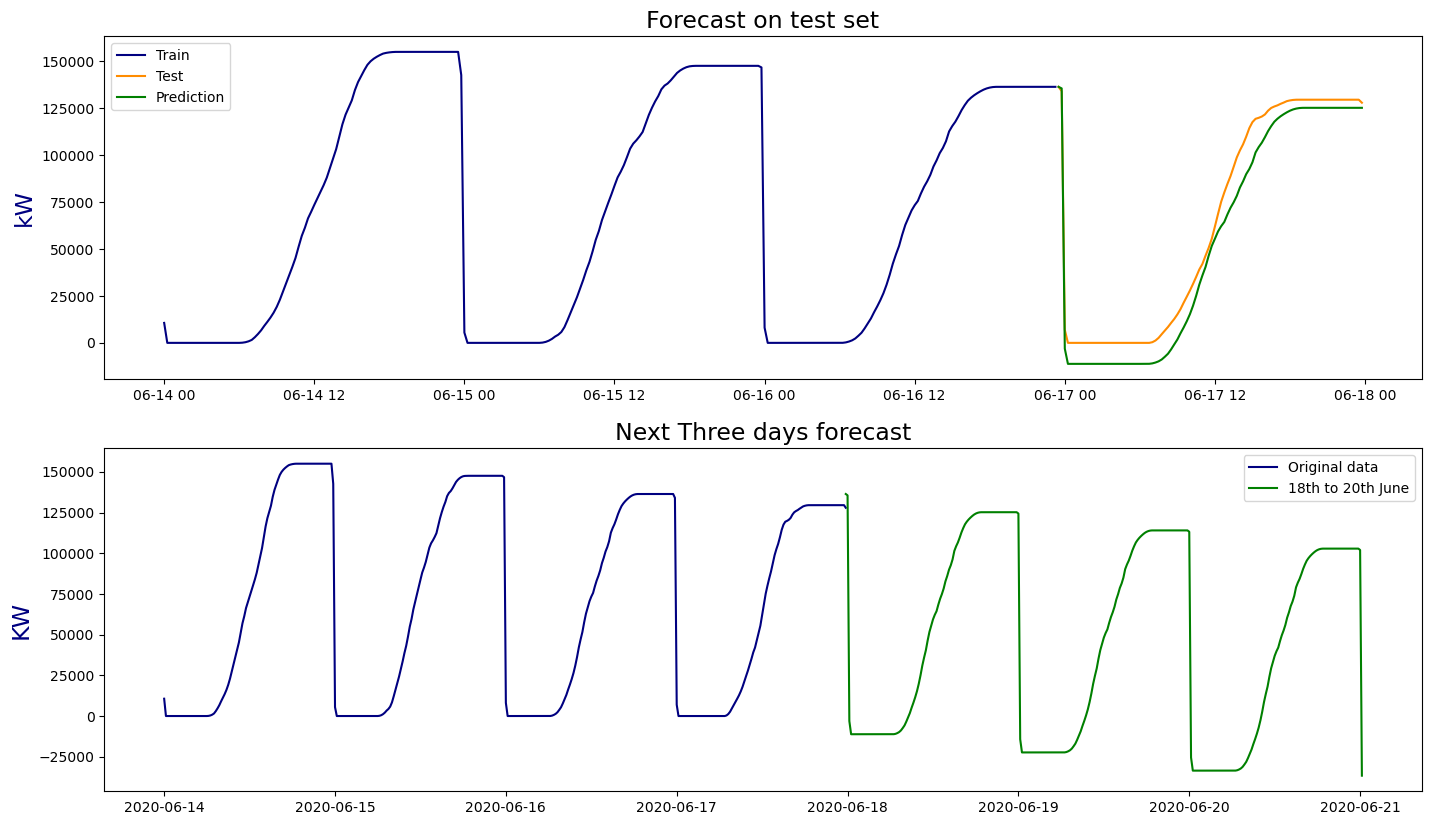

In [27]:
prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test_data.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=1,nrows=2,dpi=100,figsize=(17,10))
ax[0].plot(train_data,label='Train',color='navy')
ax[0].plot(test_data,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set',size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)


future_prediction=pd.DataFrame(arima_model.predict(n_periods=291),index=future_dates)
future_prediction.columns=['predicted_yield']
ax[1].plot(power_pred,label='Original data',color='navy')
ax[1].plot(future_prediction,label='18th to 20th June',color='green')
ax[1].legend()
ax[1].set_title('Next Three days forecast',size=17)
ax[1].set_ylabel('KW',fontsize=17,color='navy')
plt.show()

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
print('SARIMA R2 Score: %f' % (r2_score(prediction['predicted_yield'],test_data['DAILY_YIELD'])))
print('SARIMA MAE Score: %f' % (mean_absolute_error(prediction['predicted_yield'],test_data['DAILY_YIELD'])))
print('SARIMA RMSE Score: %f' % (mean_squared_error(prediction['predicted_yield'],test_data['DAILY_YIELD'],squared=False)))

SARIMAX R2 Score: 0.965213
SARIMAX MAE Score: 9893.733032
SARIMAX RMSE Score: 11025.211416


Finally we predict the power production for next three days with accuracy score of 96 %